# This notebook showcases Model Reproducibilty using the soltrannet model and Ersilia eos6oli model

Installing and Importing all neccessary Libraries

In [1]:
# install rdkit

!pip install rdkit


In [ ]:
# installing the model(eos6oli)

!pip install soltrannet


In [3]:
#importing all the necessary libraries
import soltrannet as stn
import sys
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [4]:
## Mount google drive
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
_ = sys.path.append("/content/drive/MyDrive/Ersilia")


In [6]:
# specifying my input folder
input_folder = "/content/drive/MyDrive/Ersilia"


In [7]:
# specifying my output folder
output_folder = "/content/drive/MyDrive/Ersilia"


In [8]:
input_filename = "llinas2020_raw"

In [9]:
#specifying my smiles column
smiles_column = "smiles"


In [10]:
# checking the number of smiles
path = "%s/%s.csv" % (input_folder, input_filename)
smi_col = "%s" % smiles_column
df = pd.read_csv(path)
smiles = df[smi_col].tolist()


print("My dataset contains" + " " + str(len(smiles)) + " " + "SMILES")


My dataset contains 132 SMILES


In [11]:
#checking if smiles is standardised
import rdkit
from rdkit import Chem

def is_smiles(smiles):
  try:
    mol=Chem.MolFromSmiles(smiles)
    if mol is None:
      return False
    return True
  except:
    return False


In [12]:
for i in smiles:
  if is_smiles(i):
    print("Valid SMILES")
  else:
    print("Not a valid SMILES")


Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES

Merging the predictions obtained from the model (as "prediction" column) with the predictions obtained by the author (as "true" column) into the dataframe.


In [13]:
# Extracting the smiles column from the DataFrame to make predictions
my_smiles = df["smiles"].tolist()
predictions = list(stn.predict(my_smiles))
predictions


[(-1.2419066429138184, 'CC(NC1=NN=C(S1)[S](N)(=O)=O)=O', ''),
 (-1.857985258102417, 'C(C)(=O)OC1=CC=CC=C1C(=O)O', ''),
 (-3.119774103164673, 'C=CCOc1ccc(cc1Cl)CC(=O)O', ''),
 (-2.1994705200195312, 'O[C@@H]2CC[C@@H](NCc1cc(Br)cc(Br)c1N)CC2', ''),
 (-5.205143928527832,
  'O=C1Nc2c(ccc(OCCCCN3CCN(c4c(Cl)c(Cl)ccc4)CC3)c2)CC1',
  ''),
 (-6.521167755126953, 'O=C1c2ccccc2C(=O)C(O)=C1C1CCC(CC1)c1ccc([Cl])cc1', ''),
 (-2.817272663116455, 'CCNc1nc(nc(n1)Cl)NC(C)C', ''),
 (-1.7760666608810425, 'C1=CC(=CC=C1C(CC(O)=O)CN)Cl', ''),
 (-1.8396010398864746, 'CCC(C)C1(C(=O)NC(=O)NC1=O)CC', ''),
 (-4.210572719573975,
  'C1=C(Cl)C(=CC2=C1NC(=N[S]2(=O)=O)CSCC3=CC=CC=C3)[S](N)(=O)=O',
  ''),
 (-4.71967077255249, 'O=C1Nc2c(C(c3ncccc3)=NC1)cc(Br)cc2', ''),
 (-7.789660453796387,
  'CCOC1=NC2=CC=CC(=C2N1CC3=CC=C(C=C3)C4=CC=CC=C4C5=NNN=N5)C(=O)OC(C)OC(=O)OC6CCCCC6',
  ''),
 (-3.8526968955993652, 'C1=CC=CC3=C1N(C2=C(C=CC=C2)C=C3)C(N)=O', ''),
 (-3.251559257507324, 'C1=CC=CC2=C1[NH]C3=CC=CC=C23', ''),
 (-2.4678301

In [14]:
#specifying column names in datatframe
predictions_df = pd.DataFrame(predictions, columns=["pred", "smiles", "true_values"])
#saving predictions into a dataframe to the specified path
predictions_df.to_csv("/content/drive/MyDrive/Ersilia/SoltranetPrediction.csv", index=False)
predictions_df


,pred,smiles,true_values
0,-1.241907,CC(NC1=NN=C(S1)[S](N)(=O)=O)=O,
1,-1.857985,C(C)(=O)OC1=CC=CC=C1C(=O)O,
2,-3.119774,C=CCOc1ccc(cc1Cl)CC(=O)O,
3,-2.199471,O[C@@H]2CC[C@@H](NCc1cc(Br)cc(Br)c1N)CC2,
4,-5.205144,O=C1Nc2c(ccc(OCCCCN3CCN(c4c(Cl)c(Cl)ccc4)CC3)c...,
...,...,...,...
127,-3.680895,C1=C(N=C(N=C1N[S](C2=CC=C(N)C=C2)(=O)=O)OC)OC,
128,-5.474015,C1=CC(=CC=C1\C(=C(C2=CC=CC=C2)\CC)C3=CC=CC=C3)...,
129,-7.919227,CCCc1nc2c(cc(cc2n1Cc3ccc(cc3)c4ccccc4C(=O)O)c5...,
130,-4.835241,C1=CC=CC=C1C(C3CCN(CCCC(C2=CC=C(C(C)(C)C)C=C2)...,


In [35]:
# Joining the outputs with drug names and returning the true solubility values
# Merging dataframes
merged_predictions = pd.merge(predictions_df, df[['smiles', 'log S0']], how='left', left_on='smiles', right_on='smiles')



In [16]:
# Renaming and dropping redundant columns
merged_predictions = merged_predictions.rename(columns={'log S0': 'true'})
merged_predictions = merged_predictions.drop(columns='true_values', axis=1)


In [17]:
print(merged_predictions)


         pred                                             smiles  true
0   -1.241907                     CC(NC1=NN=C(S1)[S](N)(=O)=O)=O -2.38
1   -1.857985                         C(C)(=O)OC1=CC=CC=C1C(=O)O -1.67
2   -3.119774                           C=CCOc1ccc(cc1Cl)CC(=O)O -4.40
3   -2.199471           O[C@@H]2CC[C@@H](NCc1cc(Br)cc(Br)c1N)CC2 -3.87
4   -5.205144  O=C1Nc2c(ccc(OCCCCN3CCN(c4c(Cl)c(Cl)ccc4)CC3)c... -6.64
..        ...                                                ...   ...
127 -3.680895      C1=C(N=C(N=C1N[S](C2=CC=C(N)C=C2)(=O)=O)OC)OC -3.74
128 -5.474015  C1=CC(=CC=C1\C(=C(C2=CC=CC=C2)\CC)C3=CC=CC=C3)... -7.52
129 -7.919227  CCCc1nc2c(cc(cc2n1Cc3ccc(cc3)c4ccccc4C(=O)O)c5... -6.73
130 -4.835241  C1=CC=CC=C1C(C3CCN(CCCC(C2=CC=C(C(C)(C)C)C=C2)... -7.74
131 -3.475417                  C3=CC1=C([NH]C(=N1)C2=CSC=N2)C=C3 -3.97

[132 rows x 3 columns]


Recreating the figure from the Author's publication

In [19]:
#Generating plots for Classification for the Second Challenge to Predict Aqueous Solubility
def calc_stats(pred_array, true_array, insol_thresh=-6, sol_thresh=-4):
    '''
    This function will calculate the following on the predicted array:
        Hit% = #correct(lower_sol_thresh,upper_sol_thresh) / #(lower_sol_thresh,upper_sol_thresh)
        Fail% = #true(insol_thresh)pred(lower_sol_thresh,upper_sol_thresh) / #pred(lower_sol_thresh,upper_sol_thresh)

    Assumptions: pred_array,true_array are paired numpy arrays.
    '''

    #first we need to access the examples which have true in (lower_sol_thresh, upper_sol_thresh)
    true_mask=(true_array > sol_thresh)

    #calculating the Hit%
    num_true=len(true_array[true_mask])
    poss_hits=pred_array[true_mask]
    num_hits=np.sum((poss_hits>sol_thresh))
    hit=num_hits/float(num_true)

    #calculating the Fail%
    pred_mask=(pred_array > sol_thresh)
    insol_mask=true_array <= insol_thresh
    fail=np.sum(insol_mask & pred_mask) / float(np.sum(pred_mask))

    return hit,fail,np.sum(true_mask),np.sum(pred_mask)


In [20]:
data={}

#adding the SolTranNet data
truths=np.array([])
preds=np.array([])
for s in ['set1','set2']:
    tmp=pd.read_csv('/content/drive/MyDrive/Ersilia/merged_pred.csv')
    t=tmp['TRUE']
    truths=np.append(truths,t)
    p=tmp['pred']
    preds=np.append(preds,p)

for ins in [-4,-5,-6]:
    data[ins]={'hit':[],'fail':[]}
    hit,fail,nt,npred=calc_stats(preds,truths,ins,-4)
    data[ins]['hit']=[('SolTranNet',hit)]
    data[ins]['fail']=[('SolTranNet',fail)]


In [21]:
np.mean(truths)

-4.321439393939395

19


Text(0, 0.5, 'Count')

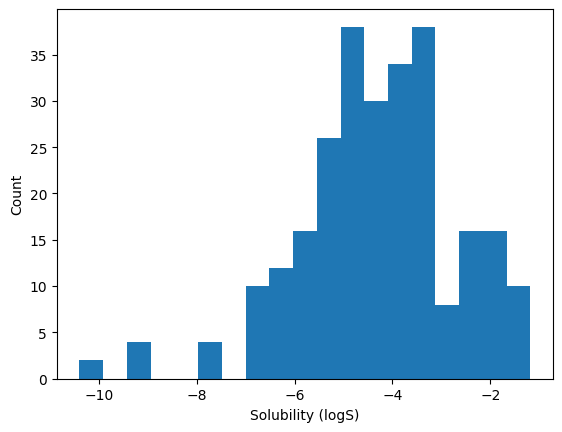

In [22]:

w=0.5
n=math.ceil((max(truths)-min(truths))/w)
print(n)
plt.hist(truths,bins=n)
plt.xlabel('Solubility (logS)')
plt.ylabel('Count')


The analysis focuses on the distribution of both SC2 test sets based on solubility classification. Here, solubility is categorized such that a molecule is considered soluble if its logarithmic solubility (log S) is greater than -4.








In [23]:
import glob
all_files=glob.glob(f'/content/drive/MyDrive/Ersilia/submitted/*.csv')
keys=set([x.split('/')[-1].split('_set')[0] for x in all_files])
for ins in [-4,-5,-6]:
    for k in keys:
        truths=np.array([])
        preds=np.array([])
        todo=glob.glob(f'/content/drive/MyDrive/Ersilia/submitted/{k}*.csv')
        for fname in todo:
            tmp=pd.read_csv(fname)
            t=tmp['TRUE']
            truths=np.append(truths,t)
            p=tmp['PREDICTED']
            preds=np.append(preds,p)
        hit,fail,nt,npred=calc_stats(preds,truths,ins,-4)
        if np.isnan(hit):
            print(f'{k} hit is nan')
        else:
            data[ins]['hit'].append((k,hit))

        if np.isnan(fail):
            print(f'{k} fail is nan')
        else:
            data[ins]['fail'].append((k,fail))


In [24]:
data

{-4: {'hit': [('SolTranNet', 0.9310344827586207),
   ('hpsu_a', 0.5517241379310345),
   ('jmsa_a', 0.9655172413793104),
   ('mlkc_b', 0.896551724137931),
   ('mlkc_c', 0.8793103448275862),
   ('jhtny', 0.896551724137931),
   ('jcsu_a', 0.8793103448275862),
   ('umut_a', 0.8793103448275862),
   ('astu', 0.7413793103448276),
   ('xwuc_a', 0.896551724137931),
   ('asll_c', 0.9827586206896551),
   ('jmsa_c', 0.9655172413793104),
   ('asll_a', 1.0),
   ('jhunc_a', 0.9482758620689655),
   ('sgurv', 0.7931034482758621),
   ('pmsa_a', 0.7586206896551724),
   ('jcsu_b', 0.9482758620689655),
   ('asll_b', 0.9137931034482759),
   ('pmsa_c', 0.7758620689655172),
   ('ytacu', 0.7586206896551724),
   ('yumpu_b', 0.7758620689655172),
   ('nmupi', 0.8275862068965517),
   ('jhunc_b', 1.0),
   ('hpsu_b', 0.5517241379310345),
   ('umut_b', 0.8793103448275862),
   ('yumpu_a', 0.7931034482758621),
   ('umut_c', 0.896551724137931),
   ('flwmu', 0.9482758620689655),
   ('mlkc_a', 0.8620689655172413),
   ('pm

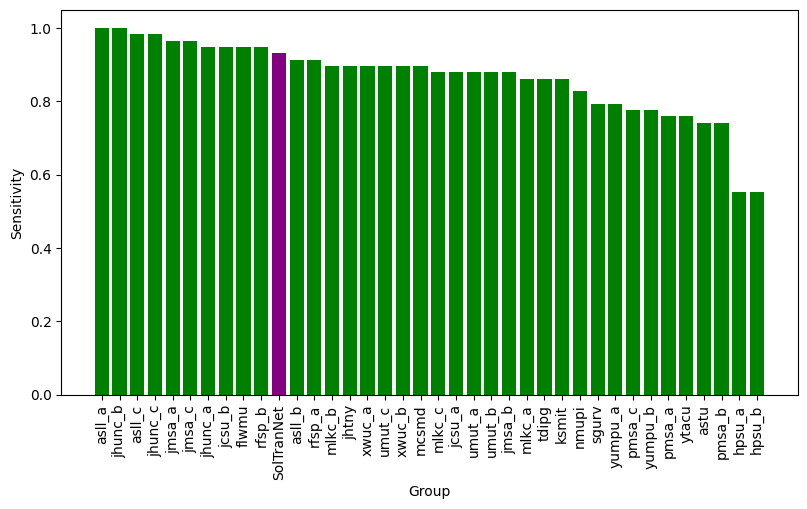

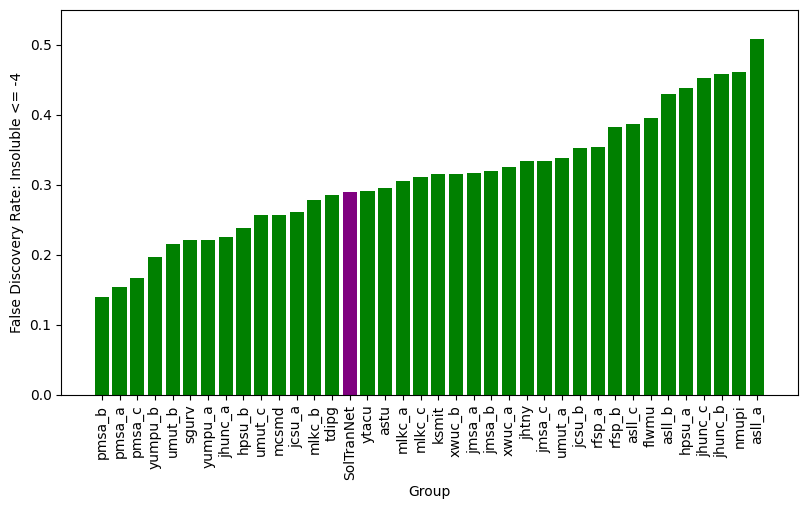

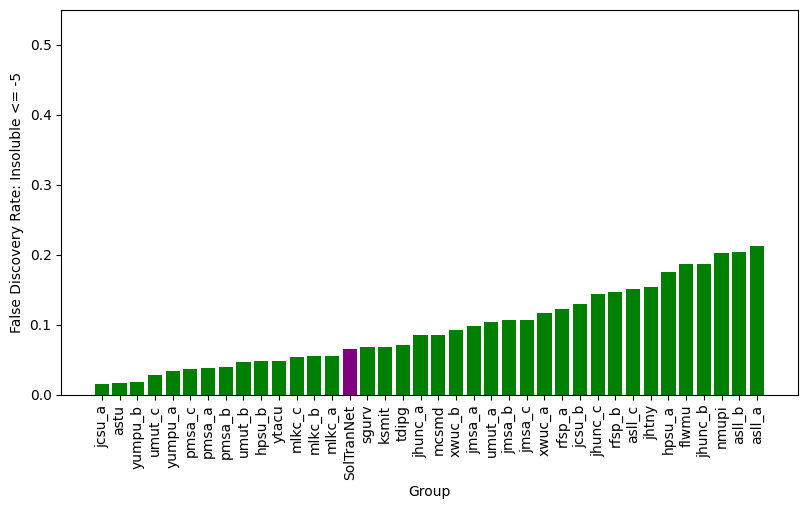

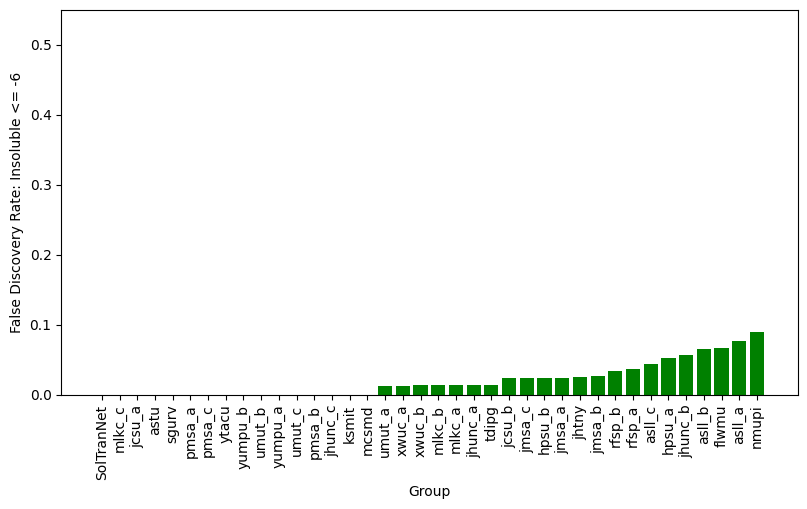

In [25]:
plotted_sens=False
for ins in data:
    for k in data[ins]:
        if k=='hit':
            if plotted_sens:
                continue
            fig=plt.figure(figsize=(9.5,5))
            all_data=sorted(data[ins][k],key=lambda x:x[1],reverse=True)
            plt.ylabel('Sensitivity')
        else:
            fig=plt.figure(figsize=(9.5,5))
            all_data=sorted(data[ins][k],key=lambda x:x[1])
            plt.ylabel(f'False Discovery Rate: Insoluble <= {ins}')
            plt.ylim((0,0.55))

        labels=[x[0] for x in all_data]
        ys=[x[1] for x in all_data]
        x_pos=[i for i,_ in enumerate(all_data)]
        colors=['purple' if x[0]=='SolTranNet' else 'green' for x in all_data]
        plt.bar(x_pos,ys,color=colors)
        plt.xlabel('Group')
        plt.xticks(x_pos,labels,rotation='vertical')
        plt.savefig(f'/content/drive/MyDrive/Ersilia/Sensitivity_Plots_{ins}Ersilia.png')
        plotted_sens=True

The false discovery rate is calculated with "insoluble" defined as log S values less than or equal to -5. Soltrannet is represented by the color purple in this context.

The false discovery rate is also computed with "insoluble" defined as log S values less than or equal to -6. Once again, Soltrannet is indicated by the color purple.








# Assessing model reproducibility by employing the eos6oli model from the Ersilia Model Hub and utilizing the same dataset utilized by the original author.








In [26]:
#creaing a miniconda environment
%%capture
%env MINICONDA_INSTALLER_SCRIPT=Miniconda3-py37_4.12.0-Linux-x86_64.sh
%env MINICONDA_PREFIX=/usr/local
%env PYTHONPATH= "$PYTHONPATH:/usr/local/lib/python3.7/site-packages"
%env PIP_ROOT_USER_ACTION=ignore
!wget https://repo.anaconda.com/miniconda/$MINICONDA_INSTALLER_SCRIPT
!chmod +x $MINICONDA_INSTALLER_SCRIPT
!./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

!python -m pip install git+https://github.com/ersilia-os/ersilia.git
!python -m pip install requests --upgrade
import sys

_ = sys.path.append("/usr/local/lib/python3.7/site-packages")




# Downloading and running the selected model(eos6oli) in Ersilia Model Hub and to ensure it works

In [27]:
model_name = "eos6oli"

In [28]:
#Fetching the Model


In [29]:
# Fetching the model
import time

begin = time.time()
!ersilia fetch $model_name
end = time.time()

print("Time taken:", round((end - begin), 2), "seconds")


⬇️  Fetching model eos6oli: soltrannet-aqueous-solubility
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
[]
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
🚀 Serving model eos6oli: soltrannet-aqueous-solubility

   URL: http://127.0.0.1:36495
   PID: 9130
   SRV: conda

👉 To run model:
   - run

💁 Information:
   - info
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
⛔ Model eos6oli closed
👍 Model eos6oli fetched successfully!
Time taken: 204.69 seconds


# Serving the Model

In [30]:
# Serving the model

# returns available APIs (calculate or predict)

!ersilia serve $model_name


sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
🚀 Serving model eos6oli: soltrannet-aqueous-solubility

   URL: http://127.0.0.1:51885
   PID: 9378
   SRV: conda

👉 To run model:
   - run

💁 Information:
   - info


# Running Predictions Using Soltrannet Data


In [31]:
#Running predictions
api = "calculate"

from ersilia import ErsiliaModel
import time

model = ErsiliaModel(model_name)
begin = time.time()
output = model.api(input=smiles, output="pandas")
end = time.time()

print("Successful 👍! Time taken:", round((end - begin), 2), "seconds")
model.close()



Successful 👍! Time taken: 18.32 seconds


In [32]:
# Checking the results

print(output.head())


                           key  \
0  BZKPWHYZMXOIDC-UHFFFAOYSA-N   
1  BSYNRYMUTXBXSQ-UHFFFAOYSA-N   
2  ARHWPKZXBHOEEE-UHFFFAOYSA-N   
3  JBDGDEWWOUBZPM-XYPYZODXSA-N   
4  CEUORZQYGODEFX-UHFFFAOYSA-N   

                                               input  solubility  
0                     CC(NC1=NN=C(S1)[S](N)(=O)=O)=O      -1.242  
1                         C(C)(=O)OC1=CC=CC=C1C(=O)O      -1.858  
2                           C=CCOc1ccc(cc1Cl)CC(=O)O      -3.120  
3           O[C@@H]2CC[C@@H](NCc1cc(Br)cc(Br)c1N)CC2      -2.199  
4  O=C1Nc2c(ccc(OCCCCN3CCN(c4c(Cl)c(Cl)ccc4)CC3)c...      -5.205  


In [33]:
#Saving results in Google Drive

output.to_csv("/content/drive/MyDrive/Ersilia/Soltranet_Ersilia.csv", index=False)


In [38]:
ErsiliaSoltranet=pd.read_csv("/content/drive/MyDrive/Ersilia/Soltranet_Ersilia.csv")
ErsiliaSoltranet.head()

,key,input,solubility
0,BZKPWHYZMXOIDC-UHFFFAOYSA-N,CC(NC1=NN=C(S1)[S](N)(=O)=O)=O,-1.242
1,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,C(C)(=O)OC1=CC=CC=C1C(=O)O,-1.858
2,ARHWPKZXBHOEEE-UHFFFAOYSA-N,C=CCOc1ccc(cc1Cl)CC(=O)O,-3.120
3,JBDGDEWWOUBZPM-XYPYZODXSA-N,O[C@@H]2CC[C@@H](NCc1cc(Br)cc(Br)c1N)CC2,-2.199
4,CEUORZQYGODEFX-UHFFFAOYSA-N,O=C1Nc2c(ccc(OCCCCN3CCN(c4c(Cl)c(Cl)ccc4)CC3)c...,-5.205


In [40]:
#matching outputs with SMILES and returning the true solubility values
# Merging dataframes
merged_predictions = pd.merge(ErsiliaSoltranet, df[['smiles', 'log S0']], how='left', left_on='input', right_on='smiles')

# Renaming and dropping redundant columns

merged_predictions = merged_predictions.rename(columns={'log S0': 'true'})

# Displaying the result
print(merged_predictions)


                             key  \
0    BZKPWHYZMXOIDC-UHFFFAOYSA-N   
1    BSYNRYMUTXBXSQ-UHFFFAOYSA-N   
2    ARHWPKZXBHOEEE-UHFFFAOYSA-N   
3    JBDGDEWWOUBZPM-XYPYZODXSA-N   
4    CEUORZQYGODEFX-UHFFFAOYSA-N   
..                           ...   
127  ZZORFUFYDOWNEF-UHFFFAOYSA-N   
128  NKANXQFJJICGDU-QPLCGJKRSA-N   
129  RMMXLENWKUUMAY-UHFFFAOYSA-N   
130  GUGOEEXESWIERI-UHFFFAOYSA-N   
131  WJCNZQLZVWNLKY-UHFFFAOYSA-N   

                                                 input  solubility  \
0                       CC(NC1=NN=C(S1)[S](N)(=O)=O)=O      -1.242   
1                           C(C)(=O)OC1=CC=CC=C1C(=O)O      -1.858   
2                             C=CCOc1ccc(cc1Cl)CC(=O)O      -3.120   
3             O[C@@H]2CC[C@@H](NCc1cc(Br)cc(Br)c1N)CC2      -2.199   
4    O=C1Nc2c(ccc(OCCCCN3CCN(c4c(Cl)c(Cl)ccc4)CC3)c...      -5.205   
..                                                 ...         ...   
127      C1=C(N=C(N=C1N[S](C2=CC=C(N)C=C2)(=O)=O)OC)OC      -3.681   
128  C1

In [41]:
#specifying path to the merged prediction
merged_predictions.to_csv("/content/drive/MyDrive/Ersilia/merged_Ersiliapredictions.csv", index=False)


# Recreating the results from the publication generated with SC2 datasets using the predictions gotten from Ersilia model


In [44]:
def calc_stats(pred_array, true_array, insol_thresh=-6, sol_thresh=-4):
    '''
    This function will calculate the following on the predicted array:
        Hit% = #correct(lower_sol_thresh,upper_sol_thresh) / #(lower_sol_thresh,upper_sol_thresh)
        Fail% = #true(insol_thresh)pred(lower_sol_thresh,upper_sol_thresh) / #pred(lower_sol_thresh,upper_sol_thresh)

    Assumptions: pred_array,true_array are paired numpy arrays.
    '''

    #first we need to access the examples which have true in (lower_sol_thresh, upper_sol_thresh)
    true_mask=(true_array > sol_thresh)

    #calculating the Hit%
    num_true=len(true_array[true_mask])
    poss_hits=pred_array[true_mask]
    num_hits=np.sum((poss_hits>sol_thresh))
    hit=num_hits/float(num_true)

    #calculating the Fail%
    pred_mask=(pred_array > sol_thresh)
    insol_mask=true_array <= insol_thresh
    fail=np.sum(insol_mask & pred_mask) / float(np.sum(pred_mask))

    return hit,fail,np.sum(true_mask),np.sum(pred_mask)



In [46]:
data={}

#adding the SolTranNet data
truths=np.array([])
preds=np.array([])
for s in ['set1','set2']:
    tmp=pd.read_csv('/content/drive/MyDrive/Ersilia/merged_Ersiliapredictions.csv')
    t=tmp['true']
    truths=np.append(truths,t)
    p=tmp['solubility']
    preds=np.append(preds,p)

for ins in [-4,-5,-6]:
    data[ins]={'hit':[],'fail':[]}
    hit,fail,nt,npred=calc_stats(preds,truths,ins,-4)
    data[ins]['hit']=[('SolTranNet',hit)]
    data[ins]['fail']=[('SolTranNet',fail)]



In [47]:
np.mean(truths)

-4.321439393939395

19


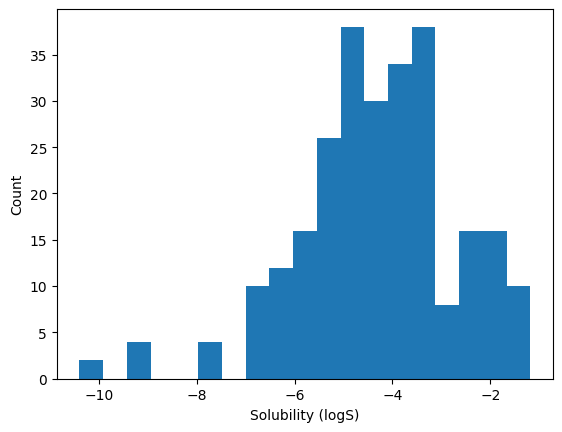

In [48]:
w=0.5
n=math.ceil((max(truths)-min(truths))/w)
print(n)
plt.hist(truths,bins=n)
plt.xlabel('Solubility (logS)')
plt.ylabel('Count')
plt.savefig('/content/drive/MyDrive/Ersilia/Reproducibility_Histplot_Ersilia.png')


In [49]:
import glob
all_files=glob.glob(f'/content/drive/MyDrive/Ersilia/submitted/*.csv')
keys=set([x.split('/')[-1].split('_set')[0] for x in all_files])
for ins in [-4,-5,-6]:
    for k in keys:
        truths=np.array([])
        preds=np.array([])
        todo=glob.glob(f'/content/drive/MyDrive/Ersilia/submitted/{k}*.csv')
        for fname in todo:
            tmp=pd.read_csv(fname)
            t=tmp['TRUE']
            truths=np.append(truths,t)
            p=tmp['PREDICTED']
            preds=np.append(preds,p)
        hit,fail,nt,npred=calc_stats(preds,truths,ins,-4)
        if np.isnan(hit):
            print(f'{k} hit is nan')
        else:
            data[ins]['hit'].append((k,hit))

        if np.isnan(fail):
            print(f'{k} fail is nan')
        else:
            data[ins]['fail'].append((k,fail))



In [50]:
data

{-4: {'hit': [('SolTranNet', 0.9310344827586207),
   ('hpsu_a', 0.5517241379310345),
   ('jmsa_a', 0.9655172413793104),
   ('mlkc_b', 0.896551724137931),
   ('mlkc_c', 0.8793103448275862),
   ('jhtny', 0.896551724137931),
   ('jcsu_a', 0.8793103448275862),
   ('umut_a', 0.8793103448275862),
   ('astu', 0.7413793103448276),
   ('xwuc_a', 0.896551724137931),
   ('asll_c', 0.9827586206896551),
   ('jmsa_c', 0.9655172413793104),
   ('asll_a', 1.0),
   ('jhunc_a', 0.9482758620689655),
   ('sgurv', 0.7931034482758621),
   ('pmsa_a', 0.7586206896551724),
   ('jcsu_b', 0.9482758620689655),
   ('asll_b', 0.9137931034482759),
   ('pmsa_c', 0.7758620689655172),
   ('ytacu', 0.7586206896551724),
   ('yumpu_b', 0.7758620689655172),
   ('nmupi', 0.8275862068965517),
   ('jhunc_b', 1.0),
   ('hpsu_b', 0.5517241379310345),
   ('umut_b', 0.8793103448275862),
   ('yumpu_a', 0.7931034482758621),
   ('umut_c', 0.896551724137931),
   ('flwmu', 0.9482758620689655),
   ('mlkc_a', 0.8620689655172413),
   ('pm

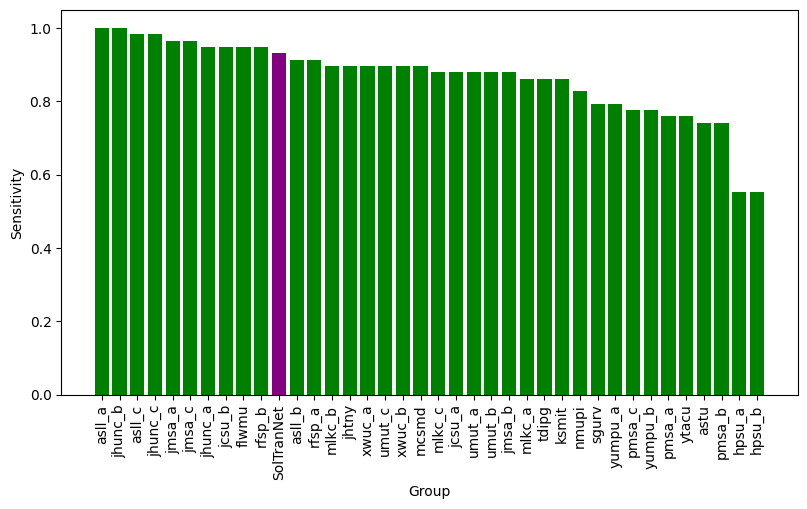

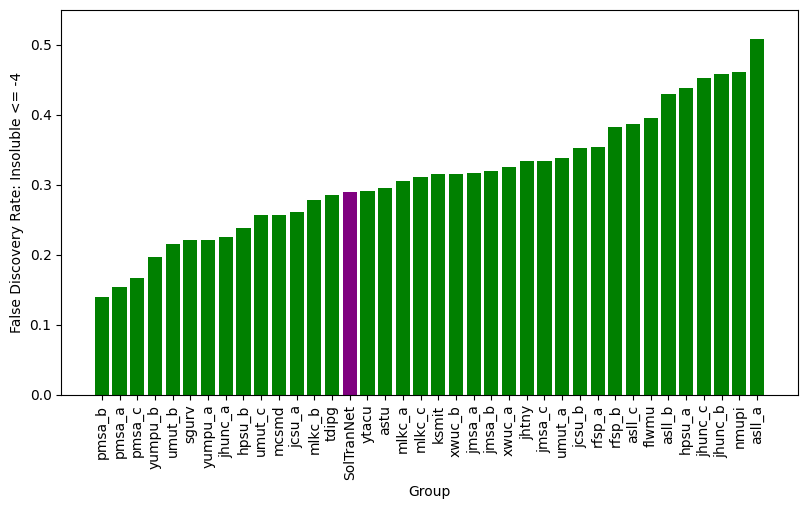

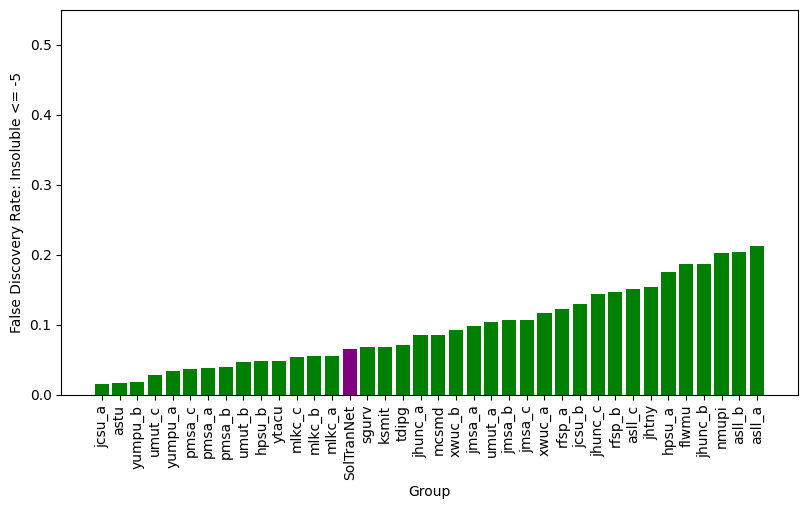

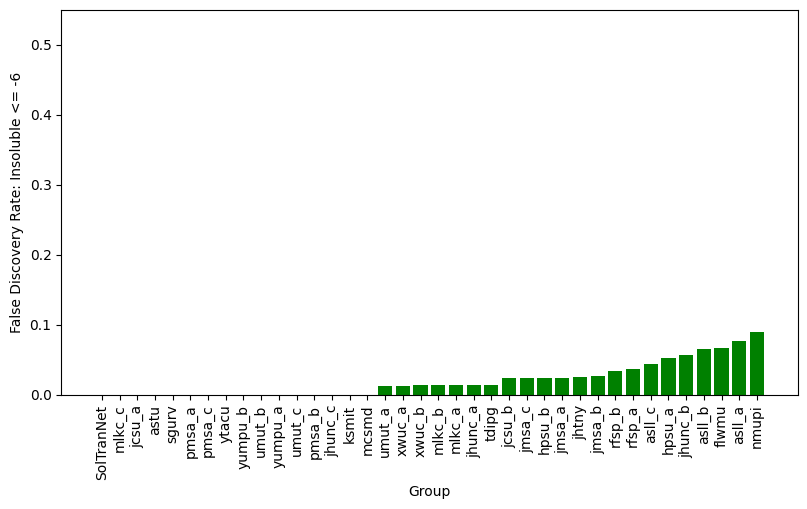

In [51]:
plotted_sens=False
for ins in data:
    for k in data[ins]:
        if k=='hit':
            if plotted_sens:
                continue
            fig=plt.figure(figsize=(9.5,5))
            all_data=sorted(data[ins][k],key=lambda x:x[1],reverse=True)
            plt.ylabel('Sensitivity')
        else:
            fig=plt.figure(figsize=(9.5,5))
            all_data=sorted(data[ins][k],key=lambda x:x[1])
            plt.ylabel(f'False Discovery Rate: Insoluble <= {ins}')
            plt.ylim((0,0.55))

        labels=[x[0] for x in all_data]
        ys=[x[1] for x in all_data]
        x_pos=[i for i,_ in enumerate(all_data)]
        colors=['purple' if x[0]=='SolTranNet' else 'green' for x in all_data]
        plt.bar(x_pos,ys,color=colors)
        plt.xlabel('Group')
        plt.xticks(x_pos,labels,rotation='vertical')
        filename = f'/content/drive/MyDrive/Ersilia/SensitivityPlot_{ins}Ersilia.png'
        plt.savefig(filename)
        plotted_sens=True

The false discovery rate is calculated with "insoluble" defined as LogS values less than or equal to -5, with Soltrannet represented in purple.

The false discovery rate is also computed with "insoluble" defined as LogS values less than or equal to -6, and Soltrannet is once again highlighted in purple.








# The evaluation of the Soltrannet model's performance in classifying compounds as soluble or insoluble.








Upon analyzing the performance of the Soltrannet model in classifying compounds as soluble or insoluble, a noteworthy insight emerged from the evaluation of false discovery rates at different thresholds. Compounds were defined as soluble if their logarithm of solubility exceeded -4. Two charts were generated, one for a false discovery rate at -5 and another at -6, revealing false positive predictions made by the model among compounds predicted to be soluble but were actually insoluble.

Interestingly, it was observed that as the threshold for soluble compounds became less strict (i.e., -5 or -6 instead of -4), the false discovery rate decreased. This trend indicates that Soltrannet is more effective at accurately screening out insoluble compounds, especially when the classification threshold is less stringent.

The insight drawn from this analysis paints a compelling narrative. The Soltrannet model demonstrates improved efficacy in discerning true solubility when a more lenient threshold is applied. This finding suggests that the model's predictive accuracy is particularly robust when dealing with less rigid classification criteria.

Moreover, the reproducibility of the eos6oli model, as evidenced by generating identical charts with matching values and counts compared to the Soltrannet model using the same dataset from the publications, further bolsters the model's credibility. This consistency underscores the reliability and replicability of the eos6oli model's performance, adding a layer of confidence to its predictive capabilities.







